In [22]:

import numpy as np
import matplotlib.pyplot as plt


In [23]:
def read_frametimes(filename):
  times = []
  with open(filename) as file:
    for line in file:
        line.rstrip()
        chunks = line.split(" ")
        if(len(chunks) != 3 or chunks[0] != "Frametime" or chunks[2] != "us\n"):
          print(chunks)
          raise ValueError(line)
        times.append(int(chunks[1]))
  # print(filename, len(times))
  return np.array(times)

def print_stats(frametimes, name):
  print(f"Num. of Frametimes {name}:\t{len(frametimes)}")
  print(f"Average {name}:\t\t\t {np.average(frametimes)} µs")
  print(f"Average FPS {name}:\t\t {10**6 / np.average(frametimes)}")
  print(f"Max {name}:\t\t\t\t {np.max(frametimes)} µs")
  print(f"Min {name}:\t\t\t\t {np.min(frametimes)} µs")
  print(f"Total Time {name}:\t\t\t {np.sum(frametimes) / (10**6)} s")
  plt.plot(frametimes)

In [24]:
import pandas as pd

In [25]:
# Define column headers
headers = ['map', 'version', '#frames', 'FT avg. (µs)', 'FT min (µs)', 'FT max (µs)', 'AVG FPS']

df = pd.DataFrame(columns=headers)
for map in ["Abyss", "KingsLeap", "Linear", "Mud", "Victory 2", "run_world_war_zero"]:
    for client in ["17.4.2", "18.9.1", "19.0", "19.1", "19.2.1", "19.3", "19.3.quadclusters"]:
        name = f"{client}-benchmark-{map}.txt"
        frametimes = read_frametimes(name)
        frametimes = frametimes[2000:]

        # print_stats(frametimes, f"{client}-{map}")
        # plt.show()

        df.loc[f"{client}-{map}"] = [map, client, len(frametimes), np.average(frametimes), np.min(frametimes), np.max(frametimes), 1000000 / np.average(frametimes)]
print(df.to_markdown())

|                                      | map                | version           |   #frames |   FT avg. (µs) |   FT min (µs) |   FT max (µs) |   AVG FPS |
|:-------------------------------------|:-------------------|:------------------|----------:|---------------:|--------------:|--------------:|----------:|
| 17.4.2-Abyss                         | Abyss              | 17.4.2            |     15636 |       1697.82  |          1647 |          2179 |   588.991 |
| 18.9.1-Abyss                         | Abyss              | 18.9.1            |      8176 |       2947.85  |          2837 |          3358 |   339.23  |
| 19.0-Abyss                           | Abyss              | 19.0              |      7922 |       3020.98  |          2945 |          4918 |   331.019 |
| 19.1-Abyss                           | Abyss              | 19.1              |      9595 |       2586.52  |          2507 |          3134 |   386.62  |
| 19.2.1-Abyss                         | Abyss              | 19.2.1  

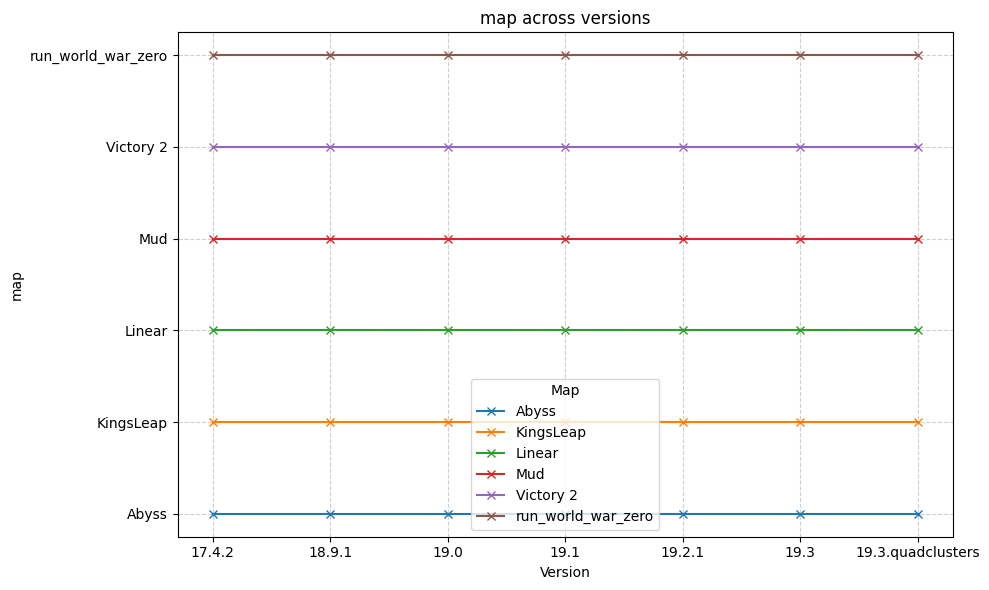

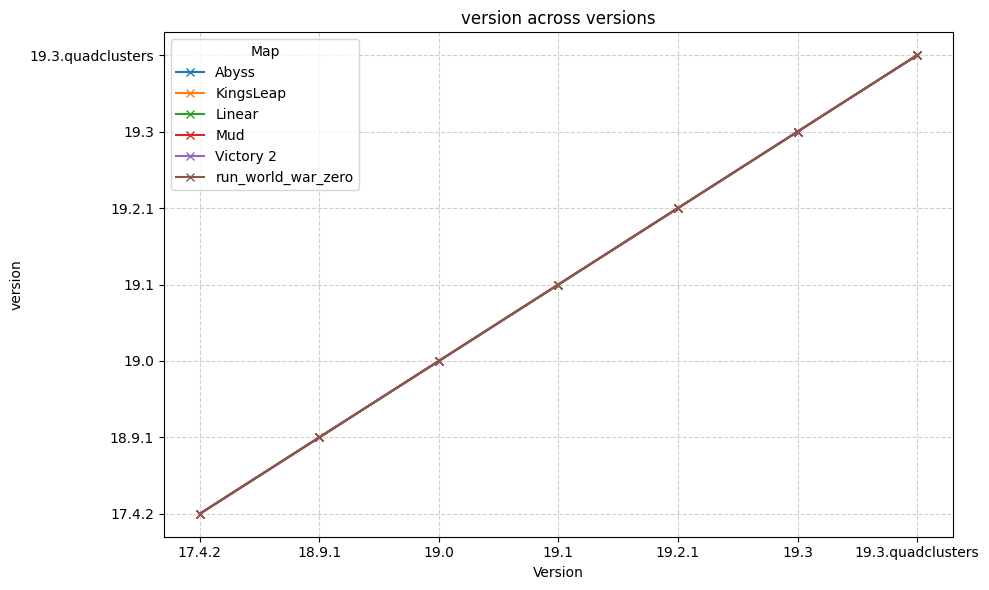

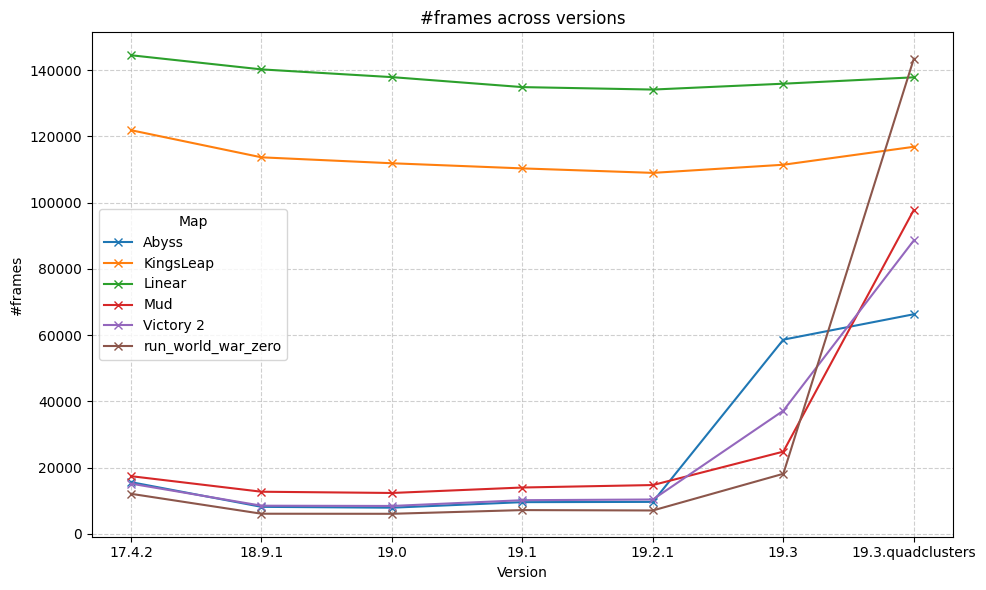

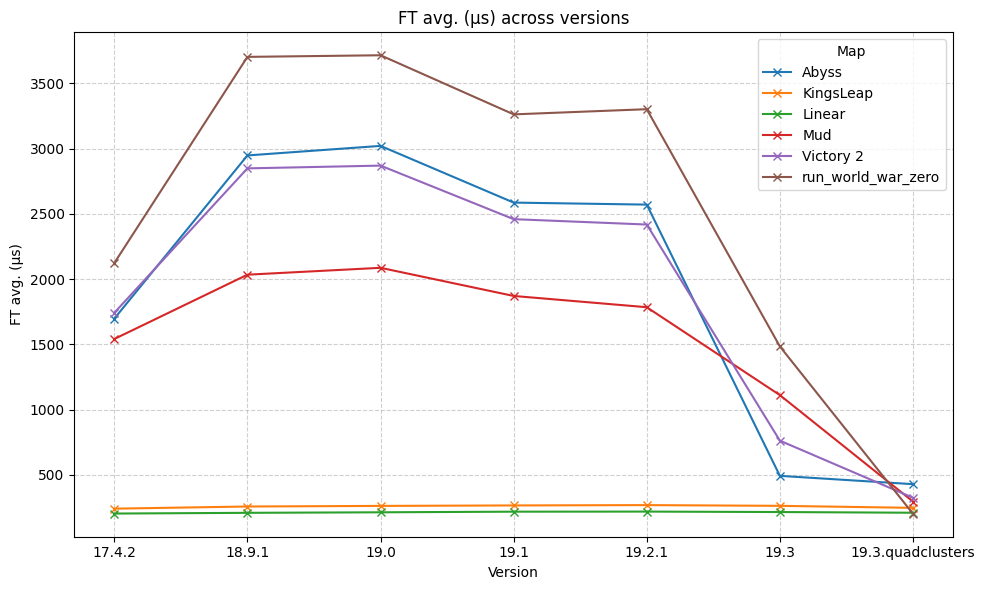

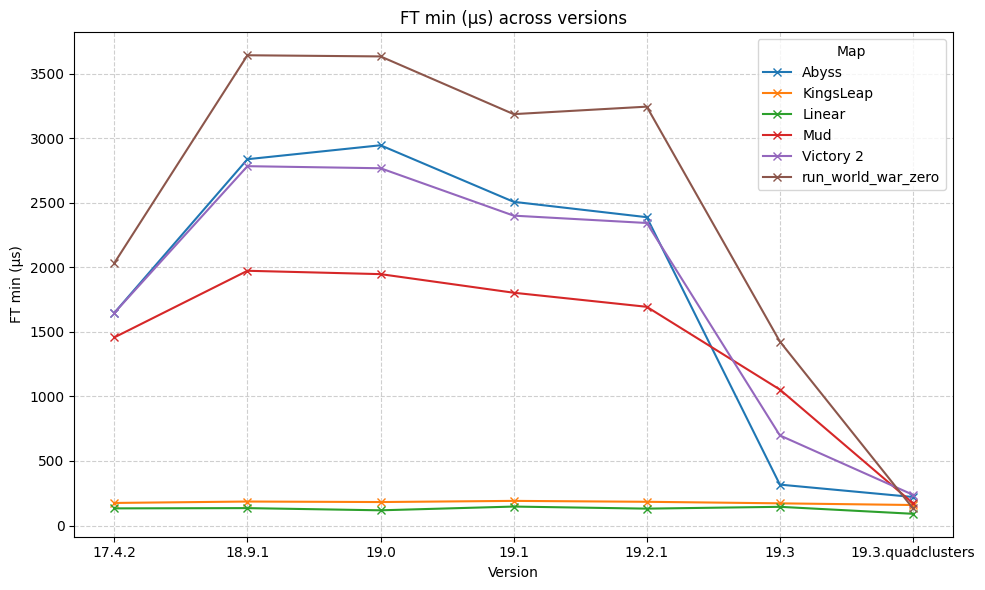

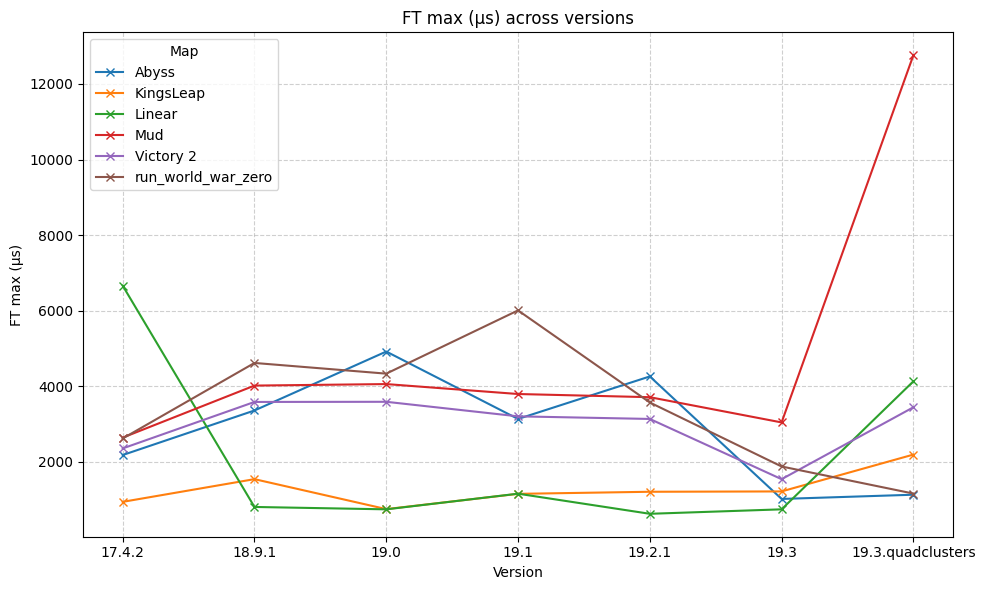

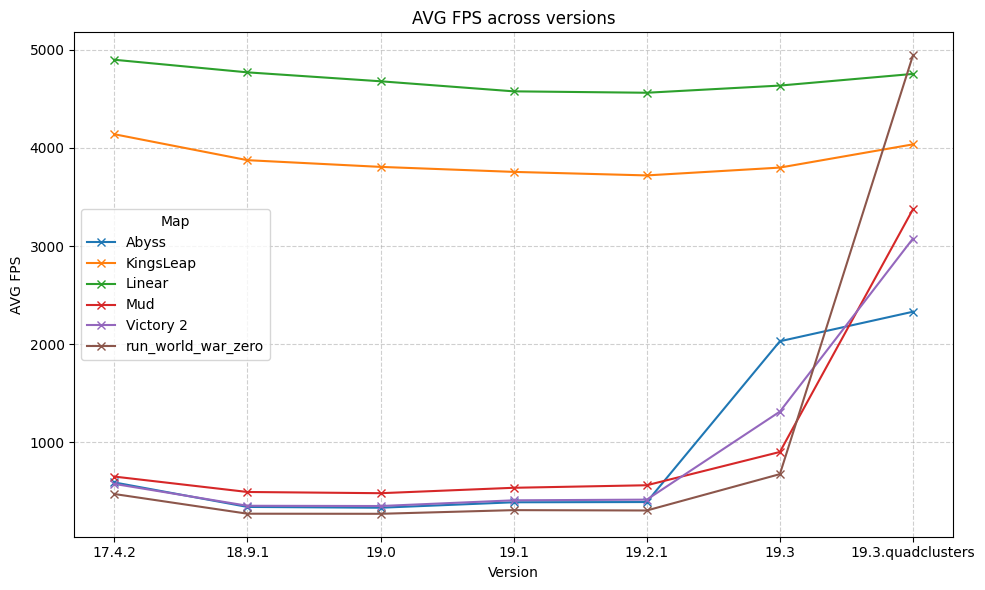

In [26]:
# Ensure versions are ordered correctly
df["version"] = pd.Categorical(df["version"], categories=df["version"].unique(), ordered=True)

for metric in headers:
  plt.figure(figsize=(10, 6))
  for map_name, map_df in df.groupby("map"):
    plt.plot(map_df["version"], map_df[metric], marker='x', label=map_name)
  plt.xlabel("Version")
  plt.ylabel(metric)
  plt.title(f"{metric} across versions")
  plt.legend(title="Map")
  plt.grid(True, linestyle="--", alpha=0.6)
  plt.tight_layout()
  plt.show()